#### Step 1: Importing all the necessary Libraries. 

In [4]:
# All the standard Libraries. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# For Missing Values Imputation. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For train-test split. 
from sklearn.model_selection import train_test_split 

# All the candidate models. 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# For calculating Metrics. 
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

# For model Saving. 
import joblib

#### Step 2: Loading and Understanding the data. 

In [7]:
df = pd.read_csv('auto_imports.csv', header=None)
column_names = ['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style', 'drive-wheels', 'engine-location',
                'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
               'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.columns = column_names
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [9]:
df.shape

(201, 26)

In [11]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df["normalized-losses"].value_counts()

normalized-losses
?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

##### Replacing all the '?' as np.nan. 

In [16]:
df.replace({'?':np.nan}, inplace=True)

In [18]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [20]:
cat_cols = df.select_dtypes(include='O')

In [22]:
cat_cols

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400
197,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300
198,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500
199,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800


#### Step 3: Correcting the datatype of the incorrect columns. 

In [25]:
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [27]:
cat_cols = df.select_dtypes(include='O')
cat_cols

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
196,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


#### Step 4: Performing Encoding on all the Categorical Columns. 

In [30]:
df['fuel-type'].value_counts()
df['fuel-type'] = df['fuel-type'].replace({'gas':1, 'diesel':2})
df['fuel-type'].dtype

dtype('int64')

In [32]:
df['aspiration'].value_counts()
df['aspiration'] = df['aspiration'].replace({'std':1, 'turbo':2})
df['aspiration'].dtype

dtype('int64')

In [34]:
df['num-of-doors'].value_counts()
df['num-of-doors'] = df['num-of-doors'].replace({'four':4, 'two':2})
df['num-of-doors'].dtype

dtype('float64')

In [36]:
df['body-style'].value_counts()
df['body-style'] = df['body-style'].replace({'sedan':1, 'hatchback':2, 'wagon':3, 'hardtop':4, 'convertible':5})
df['body-style'].dtype

dtype('int64')

In [38]:
df['drive-wheels'].value_counts()
df['drive-wheels'] = df['drive-wheels'].replace({'fwd':1, 'rwd':2, '4wd':3})
df['drive-wheels'].dtype

dtype('int64')

In [40]:
df['engine-location'].value_counts()
df['engine-location'] = df['engine-location'].replace({'front':1, 'rear':2})
df['engine-location'].dtype

dtype('int64')

In [42]:
df['engine-type'].value_counts()
df['engine-type'] = df['engine-type'].replace({'ohc':1, 'ohcf':2, 'ohcv':3, 'dohc':4, 'l':5, 'rotor':6})
df['engine-type'].dtype

dtype('int64')

In [44]:
df['num-of-cylinders'].value_counts()
df['num-of-cylinders'] = df['num-of-cylinders'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})
df['num-of-cylinders'].dtype

dtype('int64')

In [46]:
df['fuel-system'].value_counts()
df['fuel-system'] = df['fuel-system'].replace({'mpfi':1, '2bbl':2, 'idi':3, '1bbl':4, 'spdi':5, '4bbl':6, 'mfi':7, 'spfi':8})
df['fuel-system'].dtype

dtype('int64')

In [48]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,1,1,2.0,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,1,1,2.0,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,1,1,2.0,2,2,1,94.5,...,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164,audi,1,1,4.0,1,1,1,99.8,...,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164,audi,1,1,4.0,1,3,1,99.4,...,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,1,1,4.0,1,2,1,109.1,...,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95,volvo,1,2,4.0,1,2,1,109.1,...,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95,volvo,1,1,4.0,1,2,1,109.1,...,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95,volvo,2,2,4.0,1,2,1,109.1,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [53]:
df['make'].value_counts()
df['make_encoded'] = df.groupby('make')['price'].transform('mean')
df = df.drop(columns=['make'])
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3,NaN,1,1,2.0,5,2,1,88.6,168.8,...,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495,15498.333333
1,3,NaN,1,1,2.0,5,2,1,88.6,168.8,...,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500,15498.333333
2,1,NaN,1,1,2.0,2,2,1,94.5,171.2,...,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500,15498.333333
3,2,164,1,1,4.0,1,1,1,99.8,176.6,...,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950,17859.166667
4,2,164,1,1,4.0,1,3,1,99.4,176.6,...,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450,17859.166667


#### Step 5:  Now, dealing with the Missing values. 

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [61]:
print(df_imputed.isnull().sum())

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
make_encoded         0
dtype: int64


In [63]:
df_imputed

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3.0,170.705227,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,15498.333333
1,3.0,167.128643,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,15498.333333
2,1.0,157.681813,1.0,1.0,2.0,2.0,2.0,1.0,94.5,171.2,...,1.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,15498.333333
3,2.0,164.000000,1.0,1.0,4.0,1.0,1.0,1.0,99.8,176.6,...,1.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,17859.166667
4,2.0,164.000000,1.0,1.0,4.0,1.0,3.0,1.0,99.4,176.6,...,1.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,17859.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,18063.181818
197,-1.0,95.000000,1.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,18063.181818
198,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,18063.181818
199,-1.0,95.000000,2.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,18063.181818


In [65]:
df = df_imputed
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3.0,170.705227,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,15498.333333
1,3.0,167.128643,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,15498.333333
2,1.0,157.681813,1.0,1.0,2.0,2.0,2.0,1.0,94.5,171.2,...,1.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,15498.333333
3,2.0,164.000000,1.0,1.0,4.0,1.0,1.0,1.0,99.8,176.6,...,1.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,17859.166667
4,2.0,164.000000,1.0,1.0,4.0,1.0,3.0,1.0,99.4,176.6,...,1.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,17859.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,18063.181818
197,-1.0,95.000000,1.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,18063.181818
198,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,18063.181818
199,-1.0,95.000000,2.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,18063.181818


#### Step 6: Dealing with Duplicates. 

In [68]:
df.duplicated().sum()

0

#### Step 7: Dealing with Outliers. 

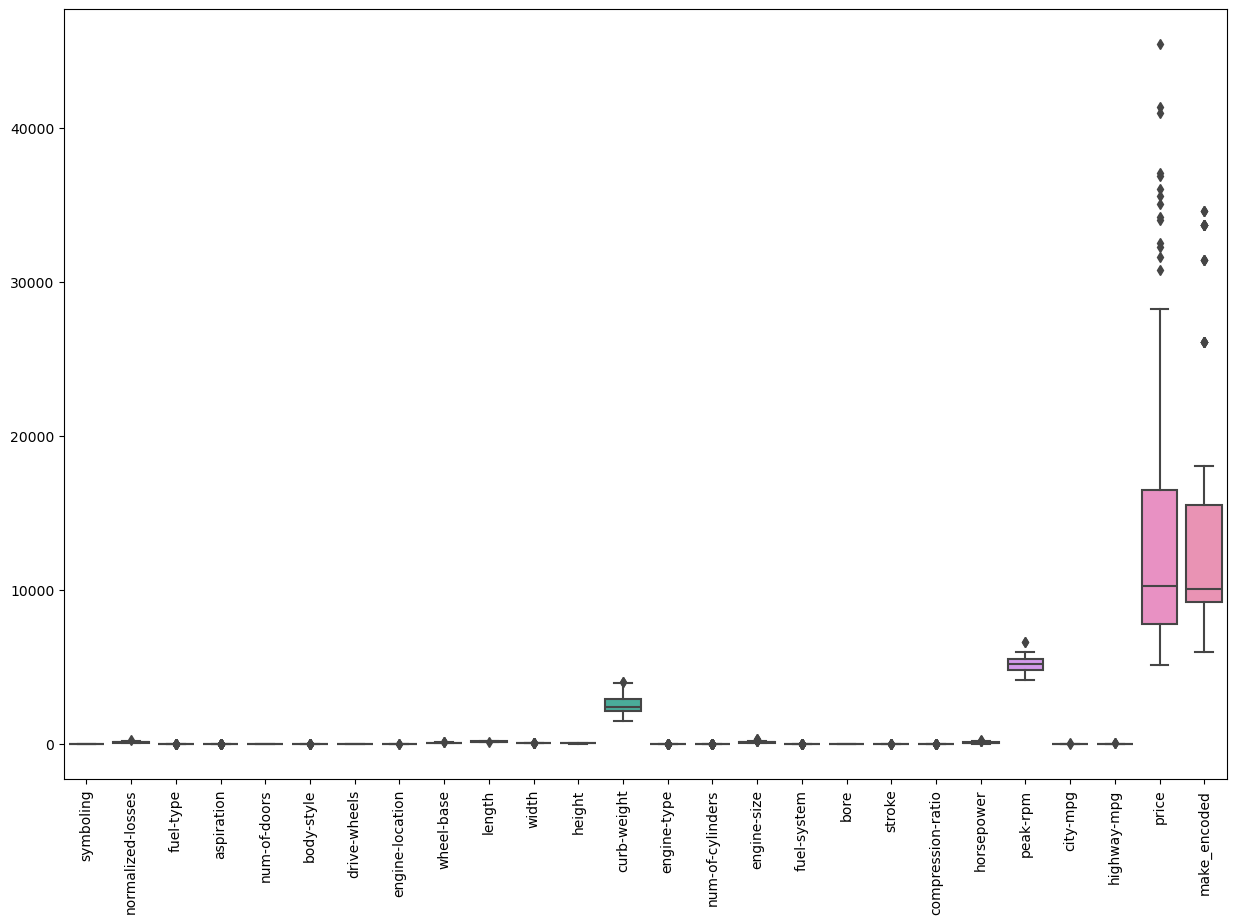

In [73]:
# Checking outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

#### Step 8: Finding Correlations. 

In [76]:
corr = df.corr()['price'].sort_values(ascending=False)
corr

price                1.000000
make_encoded         0.892113
engine-size          0.872335
curb-weight          0.834415
horsepower           0.807724
width                0.751265
num-of-cylinders     0.708645
length               0.690628
wheel-base           0.584642
bore                 0.535564
drive-wheels         0.486829
engine-location      0.331062
normalized-losses    0.297455
engine-type          0.260956
aspiration           0.179578
height               0.135486
fuel-type            0.110326
body-style           0.102013
stroke               0.080178
compression-ratio    0.071107
num-of-doors         0.046708
symboling           -0.082391
peak-rpm            -0.101637
fuel-system         -0.269354
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

<Axes: >

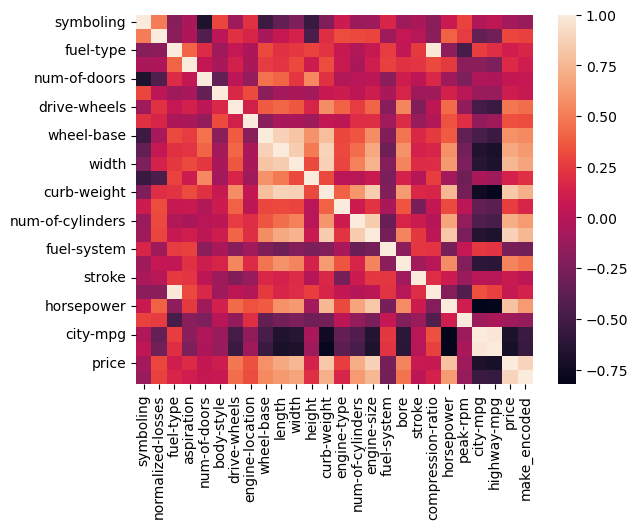

In [78]:
sns.heatmap(df.corr())

In [80]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3.0,170.705227,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,15498.333333
1,3.0,167.128643,1.0,1.0,2.0,5.0,2.0,1.0,88.6,168.8,...,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,15498.333333
2,1.0,157.681813,1.0,1.0,2.0,2.0,2.0,1.0,94.5,171.2,...,1.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,15498.333333
3,2.0,164.000000,1.0,1.0,4.0,1.0,1.0,1.0,99.8,176.6,...,1.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,17859.166667
4,2.0,164.000000,1.0,1.0,4.0,1.0,3.0,1.0,99.4,176.6,...,1.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,17859.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,18063.181818
197,-1.0,95.000000,1.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,18063.181818
198,-1.0,95.000000,1.0,1.0,4.0,1.0,2.0,1.0,109.1,188.8,...,1.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,18063.181818
199,-1.0,95.000000,2.0,2.0,4.0,1.0,2.0,1.0,109.1,188.8,...,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,18063.181818


#### Step 9: Splitting the Data and Performing Feature Scaling. 

In [83]:
### Splitting the data. 
X = df.drop('price', axis=1)
y = df['price']

In [85]:
### Checking Skewness
df.skew()

symboling            0.197370
normalized-losses    0.644292
fuel-type            2.696072
aspiration           1.686384
num-of-doors        -0.277645
body-style           1.333935
drive-wheels         0.828968
engine-location      8.061230
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-type          1.762523
num-of-cylinders     2.899683
engine-size          1.979144
fuel-system          1.757798
bore                -0.064240
stroke              -0.636423
compression-ratio    2.584462
horsepower           1.135605
peak-rpm             0.106669
city-mpg             0.680433
highway-mpg          0.549507
price                1.809675
make_encoded         1.863244
dtype: float64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [89]:
# Feature Scaling 
scaler = MinMaxScaler() 

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

#### Step 10: Model Selection and Training. 

In [92]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor() 
rfr.fit(X_train_scaled, y_train) 
y_pred = rfr.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

8363909.233975508
0.9316376801509697


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression() 
lr.fit(X_train_scaled, y_train) 
y_pred = lr.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10375605.45150767
0.9151951033110186


In [96]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

l = Lasso() 
l.fit(X_train_scaled, y_train) 
y_pred = l.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10432896.59842659
0.9147268347537417


In [98]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

r = Ridge() 
r.fit(X_train_scaled, y_train) 
y_pred = r.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


13181564.655720897
0.8922606267121401


In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

en = ElasticNet() 
en.fit(X_train_scaled, y_train) 
y_pred = en.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

83278418.82209635
0.31932476252714825


In [102]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

5354152.396851964
0.9562378944540423


In [104]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor()
catb.fit(X_train_scaled, y_train)
y_pred = catb.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

Learning rate set to 0.03065
0:	learn: 6650.3983856	total: 144ms	remaining: 2m 23s
1:	learn: 6549.7805814	total: 147ms	remaining: 1m 13s
2:	learn: 6442.2118871	total: 151ms	remaining: 50.3s
3:	learn: 6341.4565066	total: 155ms	remaining: 38.6s
4:	learn: 6240.6132283	total: 159ms	remaining: 31.6s
5:	learn: 6134.0593288	total: 162ms	remaining: 26.8s
6:	learn: 6044.5265726	total: 165ms	remaining: 23.4s
7:	learn: 5941.4313446	total: 169ms	remaining: 20.9s
8:	learn: 5869.2412693	total: 172ms	remaining: 18.9s
9:	learn: 5764.2458725	total: 175ms	remaining: 17.4s
10:	learn: 5682.8906694	total: 178ms	remaining: 16s
11:	learn: 5579.4824341	total: 184ms	remaining: 15.1s
12:	learn: 5475.1037785	total: 187ms	remaining: 14.2s
13:	learn: 5371.4175098	total: 189ms	remaining: 13.3s
14:	learn: 5292.4237710	total: 191ms	remaining: 12.5s
15:	learn: 5201.9427006	total: 193ms	remaining: 11.9s
16:	learn: 5110.3180601	total: 198ms	remaining: 11.4s
17:	learn: 5034.9586851	total: 200ms	remaining: 10.9s
18:	learn

In [106]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train_scaled, y_train)
y_pred = lgbm.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 23
[LightGBM] [Info] Start training from score 12573.681250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [108]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
adab.fit(X_train_scaled, y_train)
y_pred = adab.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

8743936.555632012
0.9285315310300635


In [110]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ("Linear Regression", LinearRegression()),
     ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("ElasticNet", ElasticNet()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("XGBoost", XGBRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor())
]


for name, model in models:
    model.fit(X_train_scaled, y_train) 
    y_pred = model.predict(X_test_scaled)  
    mse = mean_squared_error(y_test, y_pred)  
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_pred)  
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R-squared: {r2}")
    print("-" * 50) 

Linear Regression:
  Mean Squared Error: 10375605.45150767
  Root Mean Squared Error: 3221.11866461136
  R-squared: 0.9151951033110186
--------------------------------------------------
Lasso Regression:
  Mean Squared Error: 10432896.59842659
  Root Mean Squared Error: 3229.9994734406055
  R-squared: 0.9147268347537417
--------------------------------------------------
Ridge Regression:
  Mean Squared Error: 13181564.655720897
  Root Mean Squared Error: 3630.642457709227
  R-squared: 0.8922606267121401
--------------------------------------------------
ElasticNet:
  Mean Squared Error: 83278418.82209635
  Root Mean Squared Error: 9125.701004421324
  R-squared: 0.31932476252714825
--------------------------------------------------
Random Forest Regressor:
  Mean Squared Error: 7177231.224030404
  Root Mean Squared Error: 2679.0355025699837
  R-squared: 0.9413369797732252
--------------------------------------------------
XGBoost:
  Mean Squared Error: 5354152.396851964
  Root Mean Squa

In [112]:
# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# The best model in our case is XGBoost
xgb = XGBRegressor()


param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2], 
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=5,  
                           verbose=1,  
                           n_jobs=-1)  


grid_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score (MSE): 3874421.027943137
Mean Squared Error: 4993748.465206786
Root Mean Squared Error: 2234.6696546037374
R-squared: 0.9591836520131861


### It's not much difference even after Hyperparameter tuning. And I dont want to let my model overfit. So, I'll stop here, as I am happy with r2 score.

#### Step 11: Saving the best Model and the Cleaned dataset. 

In [115]:
### Saving my model and the df as well.
df.to_csv('auto_imports_cleaned_numerical.csv', index=False)

joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']

### Done!! 